<a href="https://colab.research.google.com/github/Mayank-004/Google-Trend-Analysis/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [278]:
# Download Python Binance Library (uncomment next 2 liens if library not already installed)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from patsy import dmatrices
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score,accuracy_score
import seaborn as sns
import random
import time
random.seed(786)

In [279]:
dataset= pd.read_csv('multiTimeline.csv',error_bad_lines= False, sep=',')


In [280]:
dataset

,x_t0,x_t1,x_t2
0,69,66,61
1,66,61,57
2,61,57,51
3,57,51,49
4,51,49,47
...,...,...,...
161,28,43,85
162,43,85,96
163,85,96,100
164,96,100,95


### Data Visualization

In [ ]:
df.dtypes

Time                datetime64[ns]
Open                        object
High                        object
Low                         object
Close                       object
Single_Day_Trend             int64
Two_Day_Trend                int64
dtype: object

In [ ]:
#Count Missing Data
missing = df.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / df.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent


In [ ]:
# checking duplicate values in dataset
duplicate=df[df.duplicated()]
duplicate

,Time,Open,High,Low,Close,Single_Day_Trend,Two_Day_Trend


In [ ]:
# checking if dataset is balanced or imbalanced
df['Two_Day_Trend'].value_counts(normalize=True)


1    0.530075
0    0.469925
Name: Two_Day_Trend, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


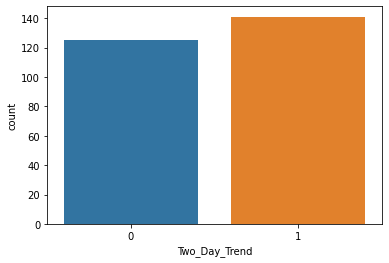

In [ ]:
# checking if dataset is balanced or imbalanced

sns.countplot(df['Two_Day_Trend'])


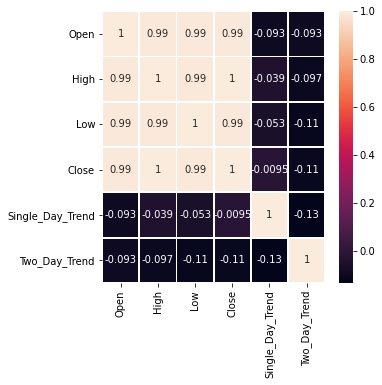

In [ ]:
df1=df.copy(deep=True)

# Filtering all Categorical variables
vars_categorical = list(df1.select_dtypes(['object']).columns)

for x in vars_categorical:
    df1.loc[:,x] = df1.loc[:,x].astype(float)


corrMatrix= df1.corr()

fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches

sns.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

In [249]:
X = dataset.loc[:,dataset.columns!='x_t2']
y = dataset['x_t2']

In [251]:
X_train = X.head(X.shape[0] -1)
y_train=y.head(y.shape[0]-1)
X_test= X.tail(1)
y_test=y.tail(1)

In [269]:

## defining a reusable function to evaluate model performance

def eval_result(model_name,y_train,y_predtrain,y_test,y_predtest,n_neighbors):

    from matplotlib import pyplot as plt

    from sklearn.metrics import mean_squared_error

    rmse_train = mean_squared_error(y_train, y_predtrain, squared=False)
    print( f"RMSE Train error for k= {n_neighbors} is {rmse_train}")
    rmse_test = mean_squared_error(y_test, y_predtest, squared=False)
    print( f"RMSE Test error for k= {n_neighbors} is {rmse_test}")

  

In [270]:
def run_model(model,verbose=True):
    t0=time.time()
    if verbose== False:
        model.fit(X_train,y_train.ravel(),verbose=0)
    else :
        model.fit(X_train,y_train.ravel())
    
    time_taken= time.time()- t0
    print(f'Time taken: {time_taken}')

# kNN Model

In [271]:
# p = 2 is equivalent to using the euclidean distance
# weights = 'distance' means closer points are weighted more heavily than further away points
n_neighbors = 3
model1 = KNeighborsRegressor(n_neighbors=n_neighbors,weights='distance',algorithm='auto',p=2)
run_model(model1)
y_hat_train = model1.predict(X_train)
y_hat_test = model1.predict(X_test)

eval_result(model1,y_train,y_hat_train,y_test,y_hat_test,n_neighbors)


Time taken: 0.00429534912109375
RMSE Train error for k= 3 is 0.6669191441105471
RMSE Test error for k= 3 is 0.9266566498721431


ValueError: ignored

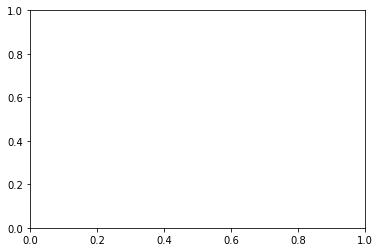

In [277]:
plt.scatter(X_train, y_train.ravel(), color='darkorange', label='data')
plt.plot(X_train, y_hat_train, color='navy', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

In [272]:
# p = 2 is equivalent to using the euclidean distance

for n_neighbors in range(1,10):
  model1 = KNeighborsRegressor(n_neighbors=n_neighbors,weights='distance',algorithm='auto',p=2)
  run_model(model1)
  y_hat_train = model1.predict(X_train)
  y_hat_test = model1.predict(X_test)

  eval_result(model1,y_train,y_hat_train,y_test,y_hat_test,n_neighbors)

Time taken: 0.0023491382598876953
RMSE Train error for k= 1 is 0.8384690232980005
RMSE Test error for k= 1 is 1.0
Time taken: 0.001657724380493164
RMSE Train error for k= 2 is 0.6973977605094789
RMSE Test error for k= 2 is 3.923026282451332
Time taken: 0.0008099079132080078
RMSE Train error for k= 3 is 0.6669191441105471
RMSE Test error for k= 3 is 0.9266566498721431
Time taken: 0.0007507801055908203
RMSE Train error for k= 4 is 0.6578968633671107
RMSE Test error for k= 4 is 2.3276348602655474
Time taken: 0.0007555484771728516
RMSE Train error for k= 5 is 0.6521138897865351
RMSE Test error for k= 5 is 1.2900451423944759
Time taken: 0.0007562637329101562
RMSE Train error for k= 6 is 0.6521138897865351
RMSE Test error for k= 6 is 1.8182059033792086
Time taken: 0.0007443428039550781
RMSE Train error for k= 7 is 0.6521138897865351
RMSE Test error for k= 7 is 0.25387750708453893
Time taken: 0.0008440017700195312
RMSE Train error for k= 8 is 0.6521138897865351
RMSE Test error for k= 8 is 0.8

In [273]:
# p = 1 is equivalent to using the manhattan distance

for n_neighbors in range(1,10):
  model1 = KNeighborsRegressor(n_neighbors=n_neighbors,weights='distance',algorithm='auto',p=1)
  run_model(model1)
  y_hat_train = model1.predict(X_train)
  y_hat_test = model1.predict(X_test)

  eval_result(model1,y_train,y_hat_train,y_test,y_hat_test,n_neighbors)

Time taken: 0.0018362998962402344
RMSE Train error for k= 1 is 0.8384690232980005
RMSE Test error for k= 1 is 1.0
Time taken: 0.0009717941284179688
RMSE Train error for k= 2 is 0.6973977605094789
RMSE Test error for k= 2 is 3.625
Time taken: 0.0008454322814941406
RMSE Train error for k= 3 is 0.6669191441105471
RMSE Test error for k= 3 is 0.9058295964125591
Time taken: 0.0007872581481933594
RMSE Train error for k= 4 is 0.6578968633671107
RMSE Test error for k= 4 is 2.570747975226297
Time taken: 0.0008387565612792969
RMSE Train error for k= 5 is 0.6521138897865351
RMSE Test error for k= 5 is 3.127832407011539
Time taken: 0.0008397102355957031
RMSE Train error for k= 6 is 0.6521138897865351
RMSE Test error for k= 6 is 2.211063162024331
Time taken: 0.0007987022399902344
RMSE Train error for k= 7 is 0.6521138897865351
RMSE Test error for k= 7 is 0.7858945455769089
Time taken: 0.0009143352508544922
RMSE Train error for k= 8 is 0.6521138897865351
RMSE Test error for k= 8 is 0.2854306826954911

In [274]:
# p = 3 is equivalent to using the minkowski distance

for n_neighbors in range(1,10):
  model1 = KNeighborsRegressor(n_neighbors=n_neighbors,weights='distance',algorithm='auto',p=3)
  run_model(model1)
  y_hat_train = model1.predict(X_train)
  y_hat_test = model1.predict(X_test)

  eval_result(model1,y_train,y_hat_train,y_test,y_hat_test,n_neighbors)

Time taken: 0.0019207000732421875
RMSE Train error for k= 1 is 0.8384690232980005
RMSE Test error for k= 1 is 7.0
Time taken: 0.0014972686767578125
RMSE Train error for k= 2 is 0.6973977605094789
RMSE Test error for k= 2 is 4.069062965020564
Time taken: 0.001007080078125
RMSE Train error for k= 3 is 0.6669191441105471
RMSE Test error for k= 3 is 0.950414067241411
Time taken: 0.0009016990661621094
RMSE Train error for k= 4 is 0.6578968633671107
RMSE Test error for k= 4 is 2.2652923131399376
Time taken: 0.0009427070617675781
RMSE Train error for k= 5 is 0.6521138897865351
RMSE Test error for k= 5 is 1.1878854694621452
Time taken: 0.0011026859283447266
RMSE Train error for k= 6 is 0.6521138897865351
RMSE Test error for k= 6 is 1.6918197888765576
Time taken: 0.0009567737579345703
RMSE Train error for k= 7 is 0.6521138897865351
RMSE Test error for k= 7 is 0.06366499596374808
Time taken: 0.0009598731994628906
RMSE Train error for k= 8 is 0.6521138897865351
RMSE Test error for k= 8 is 1.11449